In [1]:
%matplotlib inline
%run 'notebook_utils.py'

In [2]:
# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
sws_sessions = pd.read_csv('weak_scaling/sessions.csv', index_col=0)
sws_pilots = pd.read_csv('weak_scaling/pilots.csv', index_col=0)
sws_units = pd.read_csv('weak_scaling/units.csv', index_col=0)

# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
ssc_sessions = pd.read_csv('strong_scaling/sessions.csv', index_col=0)
ssc_pilots = pd.read_csv('strong_scaling/pilots.csv', index_col=0)
ssc_units = pd.read_csv('strong_scaling/units.csv', index_col=0)

In [3]:
print 'Synapse: Weak Scaling: Total number of successful runs: %s' % sws_sessions.shape[0]
print 'Synapse: Weak Scaling: Total number of pilots: %s' % sws_pilots.shape[0]
print 'Synapse: Weak Scaling: Total number of units: %s\n' % sws_units.shape[0]

print 'Synapse: Strong Scaling: Total number of successful runs: %s' % ssc_sessions.shape[0]
print 'Synapse: Strong Scaling: Total number of pilots: %s' % ssc_pilots.shape[0]
print 'Synapse: Strong Scaling: Total number of units: %s\n' % ssc_units.shape[0]

Synapse: Weak Scaling: Total number of successful runs: 6
Synapse: Weak Scaling: Total number of pilots: 6
Synapse: Weak Scaling: Total number of units: 7280

Synapse: Strong Scaling: Total number of successful runs: 6
Synapse: Strong Scaling: Total number of pilots: 6
Synapse: Strong Scaling: Total number of units: 12480



## Weak Scaling Results on Blue Waters

In [4]:
sws = sws_sessions[
    ['nunit','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING','U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING']
        ].groupby(['nunit']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std']})

sws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_EXECUTING'   :'TTX'}, axis='columns', inplace=True)
sws.rename(index={i: '%s/%s' % (i/(65*4), i*8) for i in sws.index.get_values()}, inplace=True)
sws

TTQ               Agent queueing           Agent queueing execution                   TTX                     TTC               Agent scheduling          
               mean           std           mean       std                     mean       std        mean        std         mean           std             mean       std
nunit                                                                                                                                                                     
2/4160   4771.80865   6333.079485       1.225851  0.094961                23.733801  0.397250  2098.96080   1.663681   6985.41555   6345.720292         4.042499  0.160089
4/8320   8269.93625  10071.113359       2.914751  0.394491                53.580750  8.968733  2191.00365  54.757289  10578.27985  10022.187368        11.658749  0.055366
8/16640  5322.41770   4926.347608      10.942751  0.193111               133.541199  3.950323  2372.45005   0.624446   7956.50255   5061.335919        37.274151  0.453322

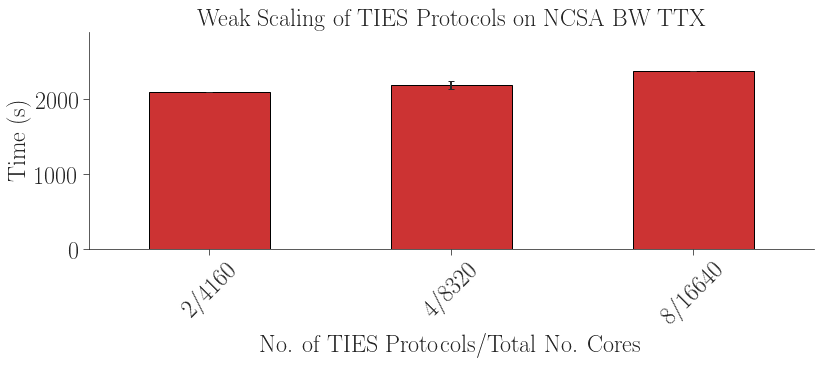

In [12]:
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars
# sws['TTC'].reset_index().plot.bar(
#     x='nunit', y='mean', yerr='std',
#     position=1.5, width=0.25, color=tableau20[1], ax=ax, rot=45,
#     legend=False)

# sws['TTQ'].reset_index().plot.bar(
#     x='nunit', y='mean', yerr='std',
#     position=0.5, width=0.25, color=tableau20[3], ax=ax, rot=45,
#     legend=False)

ax = sws['TTX'].reset_index().plot.bar(
    x='nunit', y='mean', yerr='std', 
    width=0.5, color=tableau20[6], ax=ax, rot=45, # position=-0.5, secondary_y=True,
    title='Weak Scaling of TIES Protocols on NCSA BW TTX',
    legend=False)


ax.set_xlabel('No. of TIES Protocols/Total No. Cores')
ax.set_ylabel('Time (s)')
ax.set_ylim(0,2900)
ax.set_xlim(-0.5)


plt.savefig('figures/ties_NCSA_BW_weak_scaling.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/ties_NCSA_BW_weak_scaling.png')

# Strong Scaling Results on Blue Waters

In [11]:
ssc = ssc_sessions[
    ['ncore','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING','U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING']
        ].groupby(['ncore']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std']})

ssc.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_EXECUTING'   :'TTX'}, axis='columns', inplace=True)
ssc.rename(index={i: '%s/%s' % (ssc_sessions[ssc_sessions.ncore == i].nunit[0]/(65*4), i) for i in ssc.index.get_values()}, 
           inplace=True)
ssc

TTQ                Agent queueing           Agent queueing execution                    TTX                       TTC                Agent scheduling           
                mean            std           mean       std                     mean        std        mean         std          mean            std             mean        std
ncore                                                                                                                                                                            
8/4160    54615.3224   57418.104988       4.026451  0.358574                64.620897  26.219948  8400.71615  184.511100   63118.33085   57602.061858      6159.911001  22.314310
8/8320   187590.7961  198391.997549      11.763355  9.516458               176.523704  80.578209  4357.21100   78.303591  192091.78405  198418.014765      2118.040947  49.170861
8/16640    5322.4127    4926.340537      10.942751  0.193111               133.541199   3.950323  2372.45005    0.624446    7956.50255    5061.335919        37.274151   0.453322

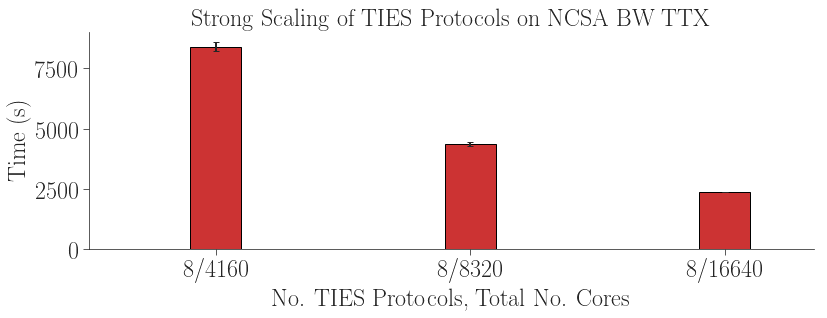

In [13]:
# fig = plt.figure(figsize=(13,4))
# ax = fig.add_subplot(111)
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars
# ssc['TTC'].reset_index().plot.bar(
#     x='ncore', y='mean', yerr='std',
#     position=1.5, width=0.1, color=tableau20[1], ax=ax, rot=0,
#     legend=False)

# ssc['TTQ'].reset_index().plot.bar(
#     x='ncore', y='mean', yerr='std',
#     position=0.5, width=0.1, color=tableau20[3], ax=ax, rot=0,
#     legend=False)

# ax1 = ssc['TTX'].reset_index().plot.bar(
ax = ssc['TTX'].reset_index().plot.bar(
    x='ncore', y='mean', yerr='std', 
    # position=-0.5, 
    width=0.2, color=tableau20[6], ax=ax, rot=0,
    title='Strong Scaling of TIES Protocols on NCSA BW TTX',
    # secondary_y=True, 
    legend=False)



ax.set_xlabel('No. TIES Protocols, Total No. Cores')
#ax.title=('Weak Scaling of TIES Protocol Instances')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
ax.set_xlim(-0.5)

# Add common legend with f* proxy artists (https://matplotlib.org/users/legend_guide.html)
# fig.legend((# mpl.patches.Patch(facecolor=tableau20[1]), 
#             # mpl.patches.Patch(facecolor=tableau20[3]), 
#             mpl.patches.Patch(facecolor=tableau20[6]),
#             mpl.lines.Line2D([], [], color='black', linestyle='dashed')),
#            (# 'TTC', 'TTQ', 'TTX (right)', 'Mean Ideal TTX (right)'), 
#             'TTX', 'Mean Ideal TTX'),
#            'upper right',
#            # ncol=2,
#            columnspacing=0.75,
#            handletextpad=0.3,
#            bbox_to_anchor=(0.9, 1))

plt.savefig('figures/ties_NCSA_BW_strong_scaling.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/ties_NCSA_BW_strong_scaling.png')